In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import healpy as hp

In [2]:
m_545 = hp.read_map("skymaps/HFI_SkyMap_545_2048_R1.10_nominal.fits")

In [3]:
hp.get_nside(m_545)
len(m_545)
print(m_545)

[0.27337316 0.21431118 0.23191074 ... 0.4008166  0.3264706  0.30938792]


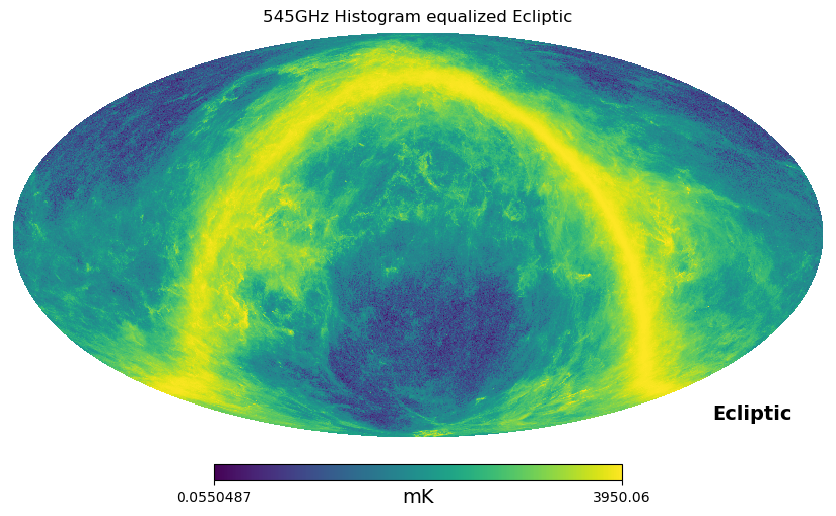

In [4]:
hp.mollview(
    m_545,
    coord=["G", "E"],
    title="545GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

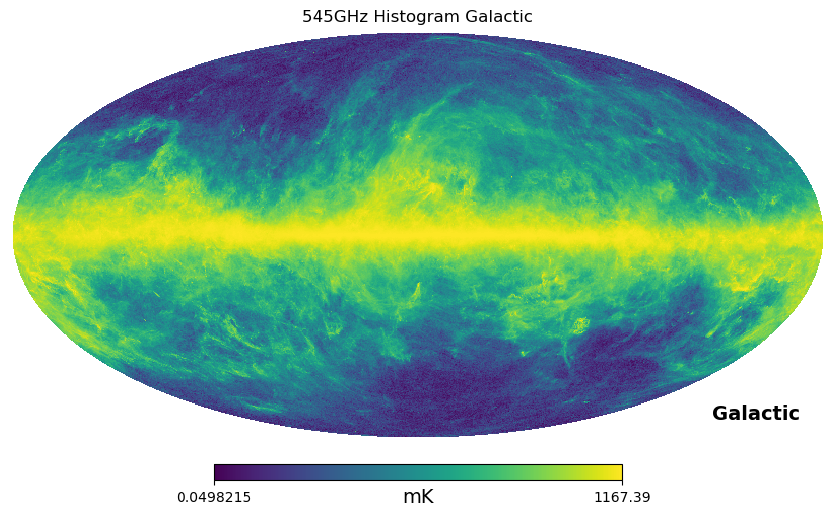

In [5]:
hp.mollview(
    m_545,
    coord=["G"],
    title="545GHz Histogram Galactic",
    unit="mK",
    norm="hist",
)

In [31]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(10))
print(m_545[ipix_disc])

[8.241446  8.138315  8.24148   ... 2.3059475 2.2225475 2.1480584]


In [32]:
submap = np.zeros(hp.nside2npix(nside=2048))
values = m_545[ipix_disc]
submap[ipix_disc] = values

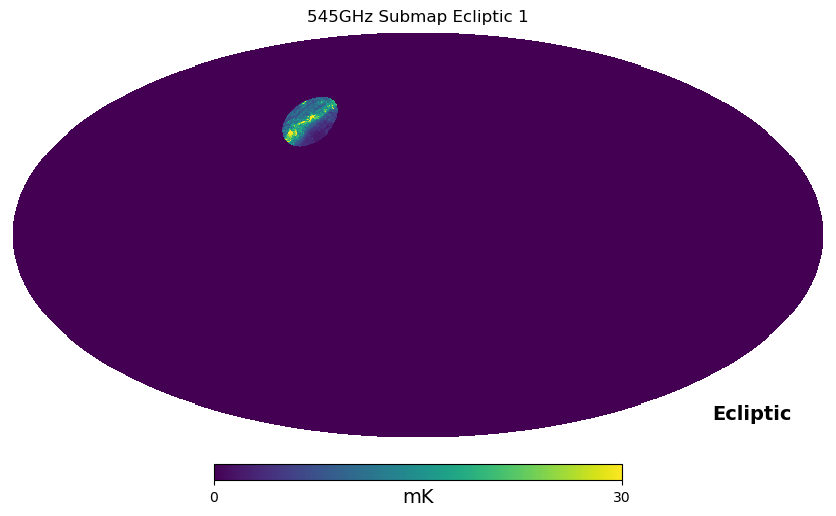

In [33]:
hp.mollview(
    submap,
    coord=["G", "E"],
    title="545GHz Submap Ecliptic 1",
    unit="mK",
    max=30
    #norm="hist",
)

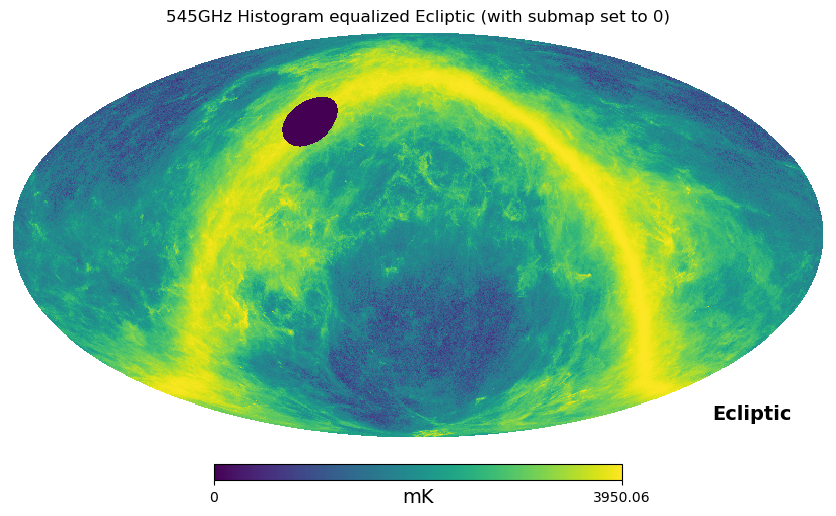

In [9]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(10))
altered_map = np.copy(m_545)
altered_map[ipix_disc] = 0
hp.mollview(
    altered_map,
    coord=["G", "E"],
    title="545GHz Histogram equalized Ecliptic (with submap set to 0)",
    unit="mK",
    norm="hist",
)

In [10]:
m_857 = hp.read_map("skymaps/HFI_SkyMap_857_2048_R1.10_nominal.fits")

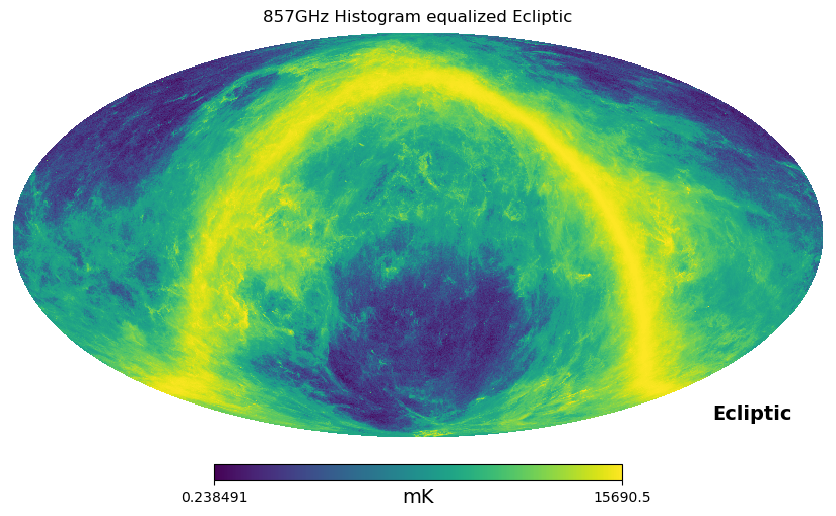

In [11]:
hp.mollview(
    m_857,
    coord=["G", "E"],
    title="857GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

In [12]:
vec = hp.ang2vec(np.pi, np.pi * 3 / 2)
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(20))
subdisc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(1))

In [13]:
submap = np.zeros(hp.nside2npix(nside=2048))
disc_values = m_857[ipix_disc]
subdisc_values = m_857[subdisc]
submap[ipix_disc] = disc_values
submap[subdisc] = 0

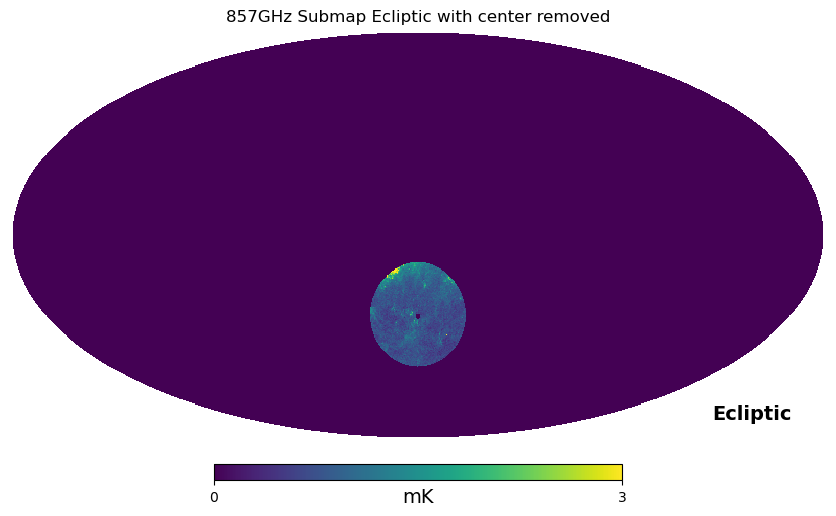

In [14]:
hp.mollview(
    submap,
    coord=["G", "E"],
    title="857GHz Submap Ecliptic with center removed",
    unit="mK",
    max=3,
    #norm="hist",
)

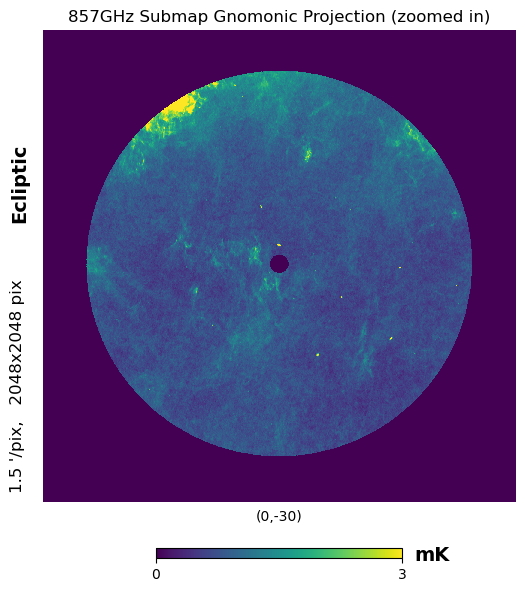

In [15]:
hp.gnomview(
    submap,
    rot=(0, -30),
    coord=["G", "E"],
    xsize=2048,
    title="857GHz Submap Gnomonic Projection (zoomed in)",
    unit="mK",
    max=3,
    #norm="hist",
)

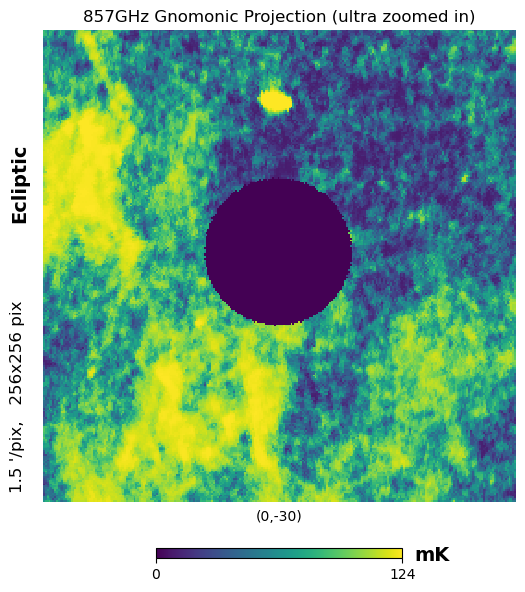

In [16]:
zoomed_857 = hp.gnomview(
    submap,
    rot=(0, -30),
    coord=["G", "E"],
    xsize=256,
    title="857GHz Gnomonic Projection (ultra zoomed in)",
    unit="mK",
    #max=1,
    norm="hist",
    return_projected_map=True
)

## Trying to figure out some way to plot a gnomview given a 2d array

In [17]:
submap = np.zeros(hp.nside2npix(nside=2048))
disc_values = m_857[ipix_disc]
subdisc_values = m_857[subdisc]
submap[ipix_disc] = disc_values
submap[subdisc] = 0

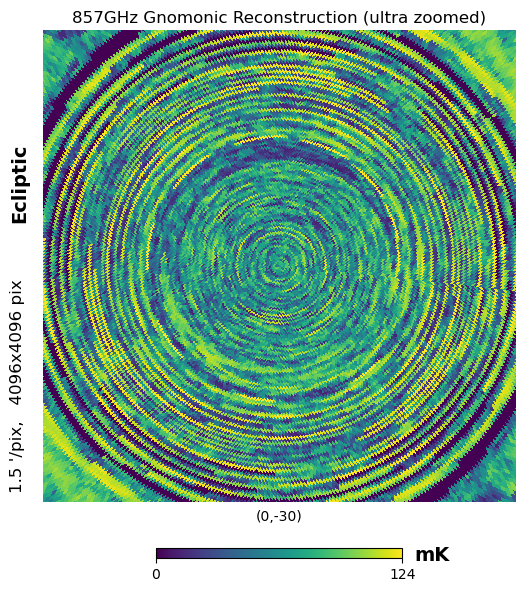

In [18]:
nside = hp.pixelfunc.get_min_valid_nside(len(zoomed_857.flatten()))
reconstruction = np.zeros(hp.nside2npix(nside))
reconstruction = np.append(reconstruction[:-len(zoomed_857.flatten())], zoomed_857.flatten())
hp.gnomview(
    reconstruction,
    rot=(0, -30),
    coord=["G", "E"],
    xsize=4096,
    title="857GHz Gnomonic Reconstruction (ultra zoomed)",
    unit="mK",
    #max=1,
    norm="hist",
)

# What the hell happened???